<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%206%20Transfer%20Learning%20(Scaling-up%2C%20FoodVision%20mini)/06_Practice_Transfer_Learning_Scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 06. Transfer Learning in TensorFlow Part 3: Scaling-up Exercise Solutions


1. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

2. Recreate the first model (the feature extraction model) with mixed_precision turned on.
  - Does it make the model train faster?
  - Does it effect the accuracy or performance of our model?
  - What's the advatanges of using mixed_precision training?
  
3. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁 .

**Note: ** Using Mixed precision eith EfficientNetB0 model will throw you an error. The error happens when you turn on mixed precision training for    EfficientNetBX models (if you're not sure what this is, you'll see it in the next video).

It'll look something like this:

```TypeError: Input 'y' of 'Sub' Op has type float16 that does not match type float32 of argument 'x' ```

As of 29 May 2021 it looks like this is a bug in TensorFlow 2.5+.

There is an issue thread tracking the progress of an update on GitHub: https://github.com/tensorflow/tensorflow/issues/49725

**Solution**

The current workaround is to **downgrade** to TensorFlow 2.4.1 (the last version before 2.5).

You can do this in Google Colab by running:
```
# Downgrade Tensorflow Version (run this in Google Colab)
!pip install tensorflow==2.4.1
```
After doing so, you'll have to restart your runtime (Runtime -> Restart runtime) to ensure TensorFlow 2.4.1 is active.


```
# Check if TensorFlow 2.4.1 is active
import tensorflow as tf
tf.__version__

>>> '2.4.1'
```

Once TensorFlow 2.4.1 is installed, the code should work as normal.

If you have any issues, please post your question/reply below so others can see.

If a fix for this issue comes for TensorFlow 2.5+ (it should), we'll update this post.

Happy mixed precision training,

To read the detailed thread: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/82

### Setting up and examining the data

In [ ]:
# Check to see if we're using a GPU
!nvidia-smi

Mon Dec 25 19:30:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Getting the data and a model readdy

In [ ]:
# Create helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-25 19:30:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-25 19:30:10 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-12-25 19:30:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   250MB/s    in 6.6s    

2023-12-25 19:30:20 (236 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
# How many images/classes are there?
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/scallops'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cheese_plate'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_fries'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sashimi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hot_and_sour_soup'.
There are 0 directories and 75 images i

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


### Train a big dog model with transfer learning on 10% of 101 food classes

Here are the steps we're going to take:
* Create a ModelCheckpoint callback
* Create a data augmentation right into the model
* Build a headless (no top layers) Functional EfficientNetB0 backboned-model (we'll create our own output layer)
* Compile our model
* Feature extract for 5 full passes (5 epochs on the train dataset and validate on 15% of the test data, to save epoch time)

In [ ]:
# Create checkpoint callback
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
# Create data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescaling(1/255.) # rescale inputs of images to between 0 & 1, required for models like ResNet50
], name="data_augmentation")

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Get a summary of model we've created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

In [ ]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5,
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)),
                                            )
                                          #  # validate on only 15% of test data during training
                                          #  callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 158s 619ms/step - loss: 3.3938 - accuracy: 0.2683 - val_loss: 2.6252 - val_accuracy: 0.4065
Epoch 2/5
237/237 [==============================] - 106s 447ms/step - loss: 2.2063 - accuracy: 0.4950 - val_loss: 2.1791 - val_accuracy: 0.4740
Epoch 3/5
237/237 [==============================] - 97s 405ms/step - loss: 1.8183 - accuracy: 0.5691 - val_loss: 2.0030 - val_accuracy: 0.4974
Epoch 4/5
237/237 [==============================] - 81s 340ms/step - loss: 1.6124 - accuracy: 0.6124 - val_loss: 1.8961 - val_accuracy: 0.5164
Epoch 5/5
237/237 [==============================] - 77s 320ms/step - loss: 1.4638 - accuracy: 0.6457 - val_loss: 1.8589 - val_accuracy: 0.5132


In [ ]:
# Evaluate on the whole tes dataset
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

790/790 [==============================] - 56s 71ms/step - loss: 1.5964 - accuracy: 0.5779


[1.5963525772094727, 0.5779010057449341]

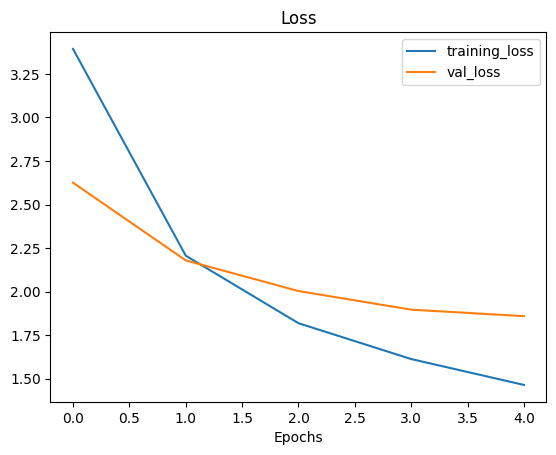

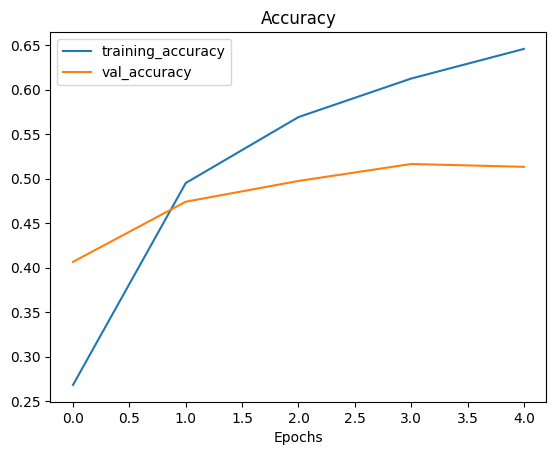

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

### Fine-tuning

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # learning rate lowered by 10x
              metrics=["accuracy"])

In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 84s 316ms/step - loss: 1.4778 - accuracy: 0.6041 - val_loss: 1.8830 - val_accuracy: 0.4976
Epoch 6/10
237/237 [==============================] - 65s 272ms/step - loss: 1.0696 - accuracy: 0.7061 - val_loss: 1.9210 - val_accuracy: 0.4971
Epoch 7/10
237/237 [==============================] - 63s 264ms/step - loss: 0.8123 - accuracy: 0.7723 - val_loss: 2.0733 - val_accuracy: 0.4873
Epoch 8/10
237/237 [==============================] - 57s 239ms/step - loss: 0.6518 - accuracy: 0.8143 - val_loss: 2.0239 - val_accuracy: 0.4995
Epoch 9/10
237/237 [==============================] - 61s 258ms/step - loss: 0.5160 - accuracy: 0.8498 - val_loss: 2.0993 - val_accuracy: 0.5114
Epoch 10/10
237/237 [==============================] - 57s 237ms/step - loss: 0.4192 - accuracy: 0.8782 - val_loss: 2.2174 - val_accuracy: 0.5013


In [ ]:
# Evaluate on the whole test data
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 55s 70ms/step - loss: 1.8540 - accuracy: 0.5713


[1.8539800643920898, 0.5712871551513672]

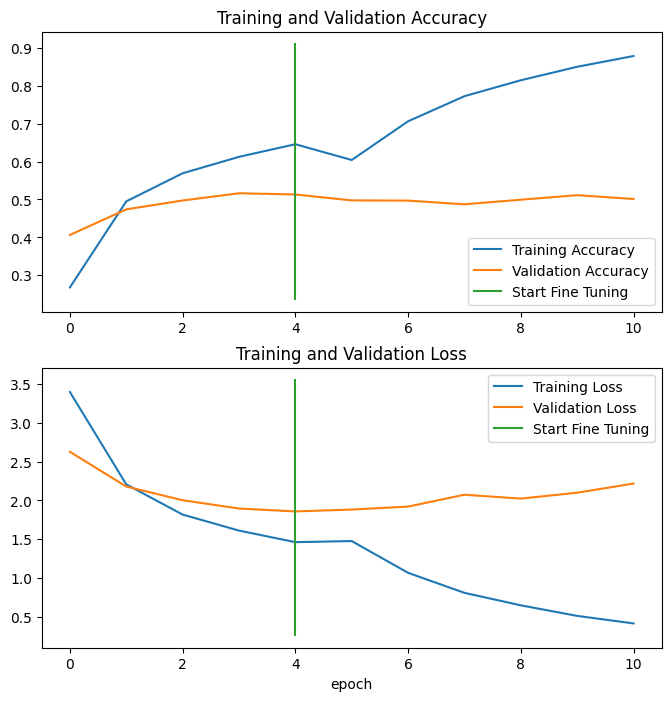

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

### Making predictions with or trained model

In [ ]:
# Make predictions with model
preds_probs = model.predict(test_data, verbose=1) # set verbosity to see how long is left
preds_probs

790/790 [==============================] - 61s 75ms/step


array([[1.61854044e-01, 4.62687858e-05, 3.41208279e-01, ...,
        1.37269296e-07, 3.00611812e-03, 9.58930119e-04],
       [9.89573061e-01, 1.84262494e-09, 1.65716585e-04, ...,
        3.57831450e-04, 1.04280762e-08, 5.56083748e-08],
       [5.08587919e-02, 3.69174257e-02, 1.38937933e-02, ...,
        1.04552695e-04, 1.29090069e-04, 1.06298714e-03],
       ...,
       [1.08323056e-05, 2.76196543e-02, 5.70272618e-07, ...,
        5.17475826e-04, 1.50536391e-04, 1.01930372e-01],
       [1.10403475e-04, 2.17090617e-03, 1.91762101e-05, ...,
        3.23611690e-04, 1.31165507e-06, 1.09273810e-02],
       [1.54522574e-03, 2.33539613e-03, 2.08747355e-04, ...,
        2.16540135e-03, 4.90995371e-05, 9.15793300e-01]], dtype=float32)

Alright now we got a model to compare, let's begin our exercise!

## 🛠 06. Transfer Learning in TensorFlow Part 3: Scaling-up Exercises

### 1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.

### Test out the big dog model on our own custom images

In [ ]:
# Get custom images
!wget https://github.com/SGhuman123/TensorFlow_HW/blob/main/custom_food_images_2.zip?raw=true

unzip_data("custom_food_images_2.zip?raw=true")

--2023-12-25 19:49:56--  https://github.com/SGhuman123/TensorFlow_HW/blob/main/custom_food_images_2.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SGhuman123/TensorFlow_HW/raw/main/custom_food_images_2.zip [following]
--2023-12-25 19:49:56--  https://github.com/SGhuman123/TensorFlow_HW/raw/main/custom_food_images_2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SGhuman123/TensorFlow_HW/main/custom_food_images_2.zip [following]
--2023-12-25 19:49:57--  https://raw.githubusercontent.com/SGhuman123/TensorFlow_HW/main/custom_food_images_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
from helper_functions import make_confusion_matrix
import matplotlib.pyplot as plt


# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channel=3).

  Args:
    filename (str): path to target image
    image_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

# Get a list of class names
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
import os

# Get the custom food images filepaths
custom_food_images = ["custom_food_images_2/" + img_path for img_path in os.listdir("custom_food_images_2")]
custom_food_images

['custom_food_images_2/foodie-flavours-d8R6skOYHUU-unsplash.jpg',
 'custom_food_images_2/rosalie-barley-qb8EK1uQF9w-unsplash.jpg',
 'custom_food_images_2/amanda-lim-YBjYWV2UUj0-unsplash.jpg',
 'custom_food_images_2/aliona-gumeniuk-_wdXUGB2GO4-unsplash.jpg',
 'custom_food_images_2/katie-musial-TbgRGRSwlNo-unsplash.jpg',
 'custom_food_images_2/kevin-lanceplaine-WxxCFDHFeLc-unsplash.jpg',
 'custom_food_images_2/esperanza-doronila-4FO9vox0T7M-unsplash.jpg',
 'custom_food_images_2/amirali-mirhashemian-JqG9YJWy6eI-unsplash.jpg',
 'custom_food_images_2/keesha-s-kitchen-fdjsZkEN-t0-unsplash.jpg',
 'custom_food_images_2/mai-qu-c-tung-lam-HyuvFrHlJZc-unsplash.jpg']

1/1 [==============================] - 0s 25ms/step


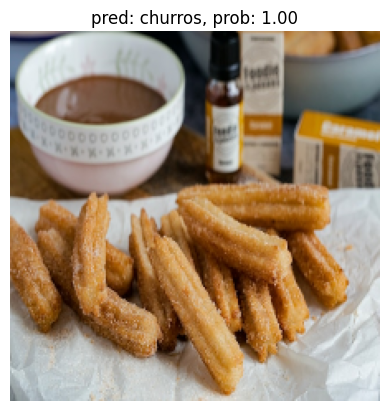

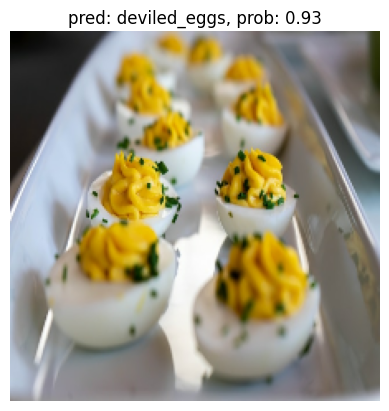

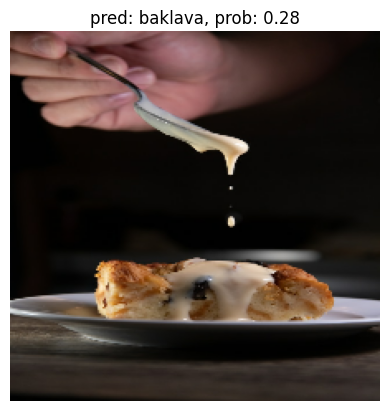

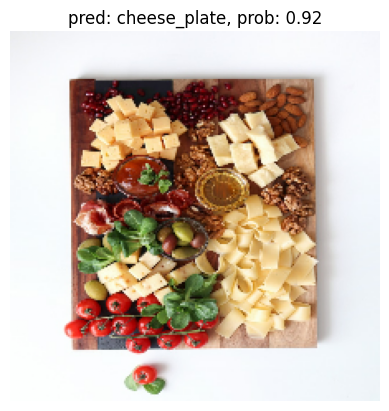

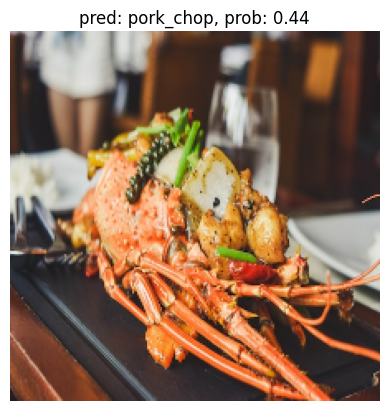

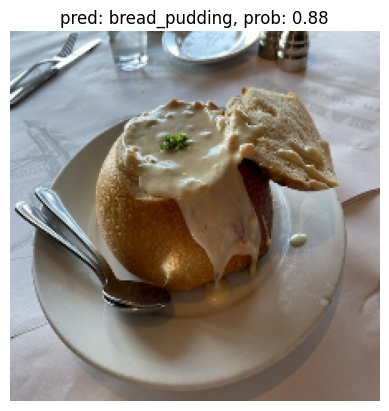

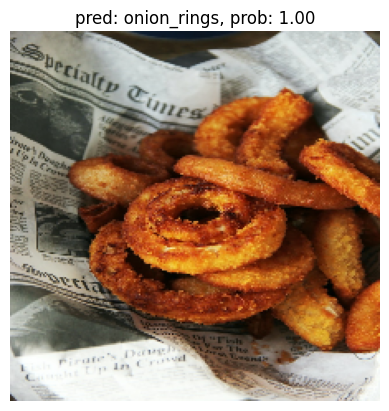

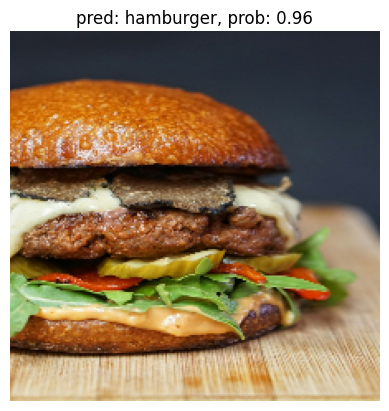

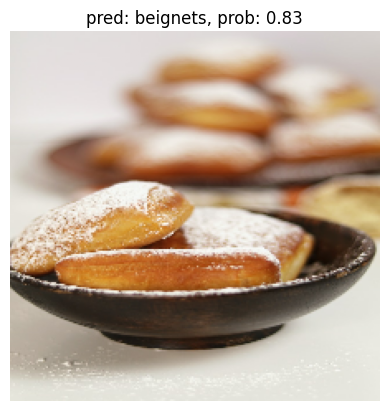

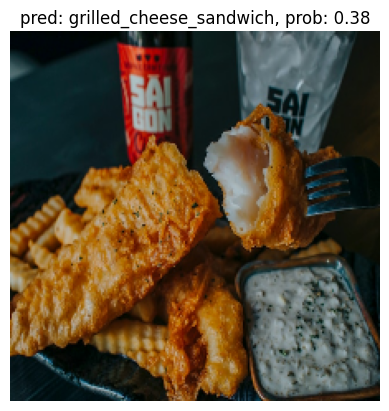

In [ ]:
# Make predictions on and plot custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # don't need to scale for our EfficientNetB0 model
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [1, 224, 224, 3] (same shape as model was trained on)
  pred_class = class_names[pred_prob.argmax()] # get the index with the highest prediction probability
  # Plot the appropriate information
  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

In [ ]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

### 2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_1.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model_1(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
feature_extractor_model = tf.keras.Model(inputs, outputs)

In [ ]:
feature_extractor_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                           

In [ ]:
# Compile
feature_extractor_model.compile(loss="categorical_crossentropy",
                                optimizer=tf.keras.optimizers.Adam(),
                                metrics=["accuracy"])

# Fit
history_feature_extractor_model = model.fit(train_data_all_10_percent,
                                           epochs=10,
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data))
                                            )
                                          #   , # validate on only 15% of test data during training
                                          #  callbacks=[checkpoint_callback])

Epoch 1/10
237/237 [==============================] - 53s 220ms/step - loss: 0.3633 - accuracy: 0.8950 - val_loss: 2.3249 - val_accuracy: 0.4849
Epoch 2/10
237/237 [==============================] - 53s 221ms/step - loss: 0.2959 - accuracy: 0.9113 - val_loss: 2.7103 - val_accuracy: 0.4621
Epoch 3/10
237/237 [==============================] - 50s 207ms/step - loss: 0.2704 - accuracy: 0.9199 - val_loss: 2.4077 - val_accuracy: 0.4894
Epoch 4/10
237/237 [==============================] - 48s 201ms/step - loss: 0.2516 - accuracy: 0.9255 - val_loss: 2.3752 - val_accuracy: 0.5164
Epoch 5/10
237/237 [==============================] - 49s 205ms/step - loss: 0.2088 - accuracy: 0.9398 - val_loss: 2.6466 - val_accuracy: 0.4894
Epoch 6/10
237/237 [==============================] - 50s 209ms/step - loss: 0.2098 - accuracy: 0.9370 - val_loss: 2.5190 - val_accuracy: 0.5090
Epoch 7/10
237/237 [==============================] - 45s 185ms/step - loss: 0.1958 - accuracy: 0.9401 - val_loss: 2.8944 - val_ac

In [ ]:
# Evaluate on the whole tes dataset
feature_extraction_results = feature_extractor_model.evaluate(test_data)
feature_extraction_results

790/790 [==============================] - 60s 72ms/step - loss: 4.7110 - accuracy: 0.0086


[4.711029529571533, 0.008554455824196339]

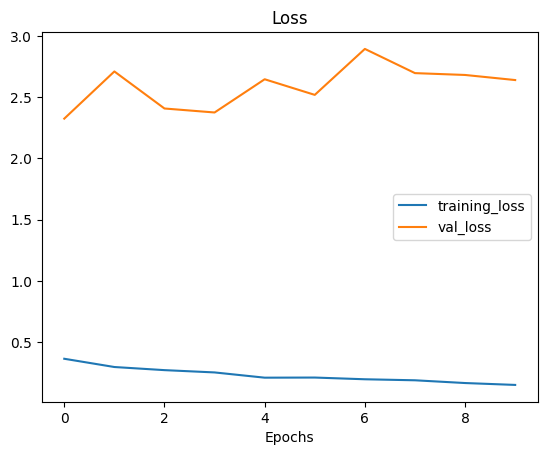

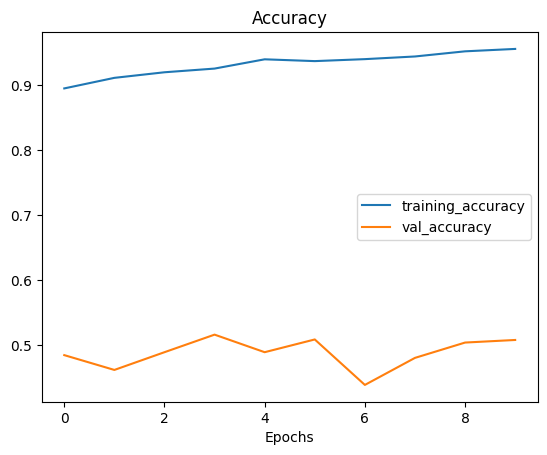

In [ ]:
plot_loss_curves(history_feature_extractor_model)

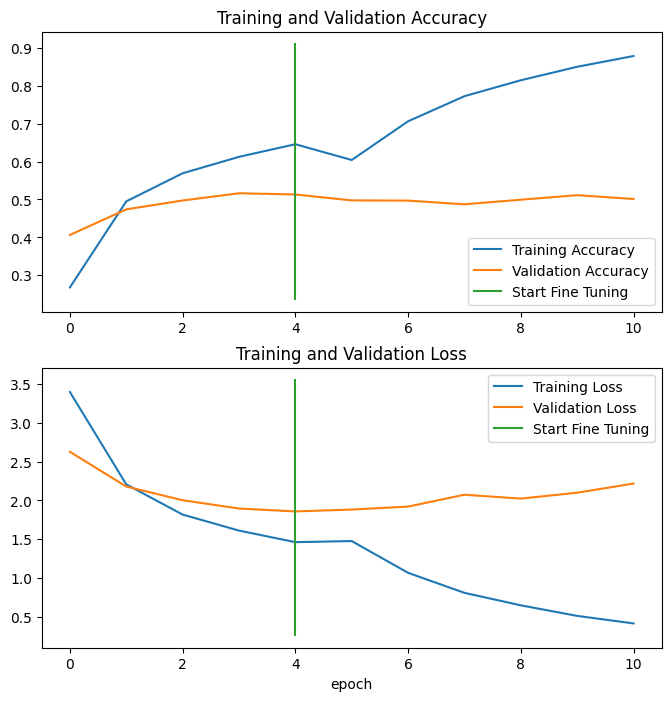

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

The **fine tune model** did better than the **feature extractor model** based on the loss curves.

### 3. Recreate the first model (the feature extraction model) with [`mixed_precision`](https://www.tensorflow.org/guide/mixed_precision) turned on.
* Does it make the model train faster?
* Does it effect the accuracy or performance of our model?
* What's the advantages of using `mixed_precision` training?

In [ ]:
# Set global policy to mixed precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [ ]:
class_names = train_data_all_10_percent.class_names

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model_3 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_3.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model_3(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
mixed_pre_model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
mixed_pre_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_mixed_feature_extractor = mixed_pre_model.fit(train_data_all_10_percent,
                                            epochs=5,
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),
                                            )

Epoch 1/5
237/237 [==============================] - 87s 324ms/step - loss: 3.3624 - accuracy: 0.2780 - val_loss: 2.6077 - val_accuracy: 0.4160
Epoch 2/5
237/237 [==============================] - 63s 263ms/step - loss: 2.1960 - accuracy: 0.5019 - val_loss: 2.1257 - val_accuracy: 0.4852
Epoch 3/5
237/237 [==============================] - 58s 243ms/step - loss: 1.8289 - accuracy: 0.5670 - val_loss: 1.9714 - val_accuracy: 0.5069
Epoch 4/5
237/237 [==============================] - 57s 238ms/step - loss: 1.5880 - accuracy: 0.6191 - val_loss: 1.8839 - val_accuracy: 0.5212
Epoch 5/5
237/237 [==============================] - 55s 229ms/step - loss: 1.4561 - accuracy: 0.6401 - val_loss: 1.8076 - val_accuracy: 0.5339


In [ ]:
# Get a summary of model we've created
mixed_pre_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                           

In [ ]:
# Unfreeze all of the layers in the base model
base_model_3.trainable = True

# Refreeze every layer except the last 5
for layer in base_model_3.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
mixed_pre_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(lr=0.0001), # learning rate lowered by 10x
                        metrics=["accuracy"])

In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(base_model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_mixed_feature_extractor_fine_tune = mixed_pre_model.fit(train_data_all_10_percent,
                                                                epochs=fine_tune_epochs,
                                                                validation_data=test_data,
                                                                validation_steps=int(0.15 * len(test_data)),
                                                                initial_epoch=history_mixed_feature_extractor.epoch[-1])

Epoch 5/10
237/237 [==============================] - 64s 230ms/step - loss: 1.4862 - accuracy: 0.6029 - val_loss: 1.7385 - val_accuracy: 0.5442
Epoch 6/10
237/237 [==============================] - 53s 221ms/step - loss: 1.0621 - accuracy: 0.7084 - val_loss: 1.9021 - val_accuracy: 0.5162
Epoch 7/10
237/237 [==============================] - 49s 207ms/step - loss: 0.8161 - accuracy: 0.7663 - val_loss: 1.9416 - val_accuracy: 0.5196
Epoch 8/10
237/237 [==============================] - 45s 186ms/step - loss: 0.6583 - accuracy: 0.8117 - val_loss: 1.9527 - val_accuracy: 0.5201
Epoch 9/10
237/237 [==============================] - 44s 183ms/step - loss: 0.5109 - accuracy: 0.8511 - val_loss: 2.1792 - val_accuracy: 0.5024
Epoch 10/10
237/237 [==============================] - 46s 191ms/step - loss: 0.4303 - accuracy: 0.8723 - val_loss: 2.1936 - val_accuracy: 0.5146


- **Does it make the model train faster?**
    
  Not much, but it saved us some seconds.

- **Does it effect the accuracy or performance of our model?**

  By 1% not that much tho.
- **What's the advatanges of using mixed_precision training?**

  The advantages of mixed precision is evident when we are training pretty big models for longer epochs. In that case, we can spot a huge difference in our training time.


In [ ]:
# Evaluate on the whole test data
mixed_feature_extractor_fine_tune_results = mixed_pre_model.evaluate(test_data)
mixed_feature_extractor_fine_tune_results

790/790 [==============================] - 52s 66ms/step - loss: 1.9650 - accuracy: 0.5660


[1.965049386024475, 0.5660197734832764]

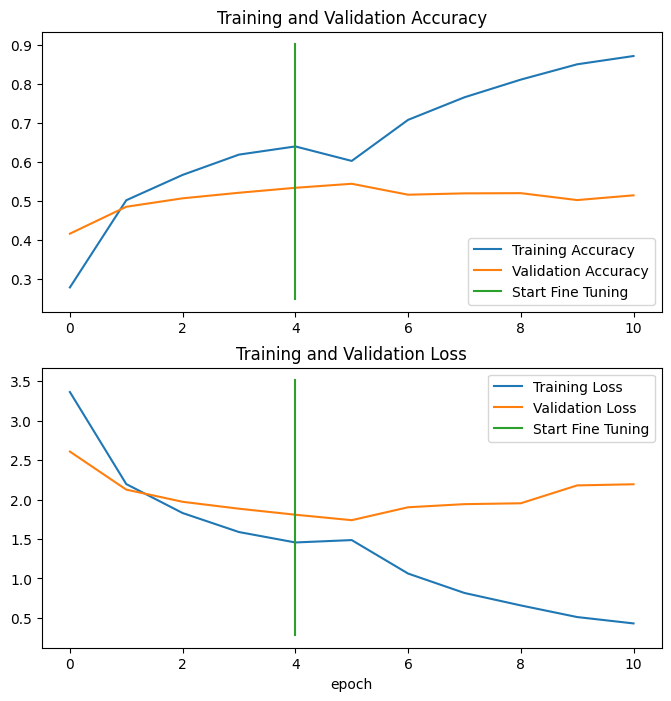

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_mixed_feature_extractor,
                 new_history=history_mixed_feature_extractor_fine_tune,
                 initial_epochs=5)

### 4. Improve upon model in (3) by changing optimizer to SGD

In [ ]:
# Set global policy to mixed precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [ ]:
class_names = train_data_all_10_percent.class_names

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model_4 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_4.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model_4(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
mixed_pre_model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
mixed_pre_model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit
history_mixed_feature_extractor_2 = mixed_pre_model_2.fit(train_data_all_10_percent,
                                            epochs=5,
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),
                                            )

Epoch 1/5
237/237 [==============================] - 38s 122ms/step - loss: 4.5511 - accuracy: 0.0292 - val_loss: 4.2933 - val_accuracy: 0.0850
Epoch 2/5
237/237 [==============================] - 25s 104ms/step - loss: 4.1958 - accuracy: 0.1230 - val_loss: 4.0338 - val_accuracy: 0.1803
Epoch 3/5
237/237 [==============================] - 26s 106ms/step - loss: 3.9106 - accuracy: 0.2240 - val_loss: 3.8038 - val_accuracy: 0.2669
Epoch 4/5
237/237 [==============================] - 25s 103ms/step - loss: 3.6592 - accuracy: 0.2935 - val_loss: 3.6035 - val_accuracy: 0.3091
Epoch 5/5
237/237 [==============================] - 25s 106ms/step - loss: 3.4431 - accuracy: 0.3465 - val_loss: 3.4266 - val_accuracy: 0.3488


In [ ]:
# Get a summary of model we've created
mixed_pre_model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                           

In [ ]:
# Unfreeze all of the layers in the base model
base_model_4.trainable = True

# Refreeze every layer except the last 5
for layer in base_model_4.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
mixed_pre_model_2.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.SGD(lr=0.0001), # learning rate lowered by 10x
                        metrics=["accuracy"])

In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(base_model_4.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_14 False
2 normalization_7 False
3 rescaling_15 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_mixed_feature_extractor_fine_tune_2 = mixed_pre_model_2.fit(train_data_all_10_percent,
                                                                epochs=fine_tune_epochs,
                                                                validation_data=test_data,
                                                                validation_steps=int(0.15 * len(test_data)),
                                                                initial_epoch=history_mixed_feature_extractor.epoch[-1])

Epoch 5/10
237/237 [==============================] - 39s 129ms/step - loss: 2.8602 - accuracy: 0.3952 - val_loss: 2.5970 - val_accuracy: 0.3922
Epoch 6/10
237/237 [==============================] - 29s 121ms/step - loss: 2.3605 - accuracy: 0.4331 - val_loss: 2.3146 - val_accuracy: 0.4240
Epoch 7/10
237/237 [==============================] - 29s 119ms/step - loss: 2.1506 - accuracy: 0.4665 - val_loss: 2.1946 - val_accuracy: 0.4296
Epoch 8/10
237/237 [==============================] - 30s 125ms/step - loss: 2.0172 - accuracy: 0.4956 - val_loss: 2.0571 - val_accuracy: 0.4711
Epoch 9/10
237/237 [==============================] - 30s 121ms/step - loss: 1.9230 - accuracy: 0.5133 - val_loss: 2.0217 - val_accuracy: 0.4756
Epoch 10/10
237/237 [==============================] - 28s 118ms/step - loss: 1.8205 - accuracy: 0.5394 - val_loss: 1.9640 - val_accuracy: 0.4860


In [ ]:
# Evaluate on the whole test data
mixed_feature_extractor_fine_tune_results_2 = mixed_pre_model_2.evaluate(test_data)
mixed_feature_extractor_fine_tune_results_2

790/790 [==============================] - 65s 82ms/step - loss: 1.7530 - accuracy: 0.5345


[1.7530438899993896, 0.5344950556755066]

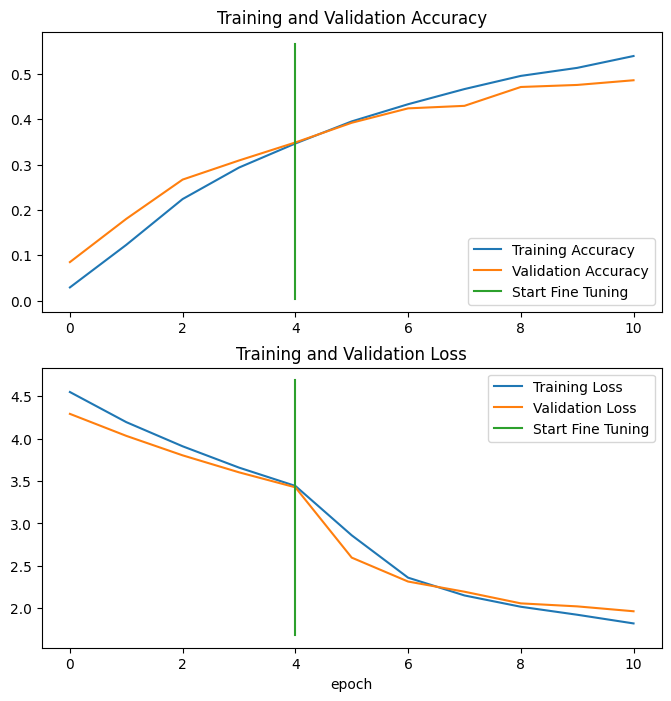

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_mixed_feature_extractor_2,
                 new_history=history_mixed_feature_extractor_fine_tune_2,
                 initial_epochs=5)

### 5. Improve upon model in (3) by adding in weighted regularization

In [ ]:
# Set global policy to mixed precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [ ]:
class_names = train_data_all_10_percent.class_names

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model_5 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_5.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model_5(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

### CHANGE 1: Example of adding L2 regularization to the dense layer ###
x = layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
mixed_pre_model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
mixed_pre_model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_mixed_feature_extractor_3 = mixed_pre_model_3.fit(train_data_all_10_percent,
                                            epochs=5,
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),
                                            )

Epoch 1/5
237/237 [==============================] - 42s 133ms/step - loss: 4.7584 - accuracy: 0.2710 - val_loss: 3.2659 - val_accuracy: 0.3811
Epoch 2/5
237/237 [==============================] - 31s 129ms/step - loss: 3.0493 - accuracy: 0.4215 - val_loss: 3.0288 - val_accuracy: 0.3991
Epoch 3/5
237/237 [==============================] - 29s 122ms/step - loss: 2.8159 - accuracy: 0.4570 - val_loss: 2.8550 - val_accuracy: 0.4431
Epoch 4/5
237/237 [==============================] - 27s 113ms/step - loss: 2.7167 - accuracy: 0.4766 - val_loss: 2.8106 - val_accuracy: 0.4333
Epoch 5/5
237/237 [==============================] - 28s 117ms/step - loss: 2.6588 - accuracy: 0.4818 - val_loss: 2.7085 - val_accuracy: 0.4613


In [ ]:
# Get a summary of model we've created
mixed_pre_model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                           

In [ ]:
# Unfreeze all of the layers in the base model
base_model_5.trainable = True

# Refreeze every layer except the last 5
for layer in base_model_5.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
mixed_pre_model_3.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(lr=0.0001), # learning rate lowered by 10x
                        metrics=["accuracy"])

In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(base_model_5.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_9 False
1 rescaling_16 False
2 normalization_8 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_mixed_feature_extractor_fine_tune_3 = mixed_pre_model_3.fit(train_data_all_10_percent,
                                                                epochs=fine_tune_epochs,
                                                                validation_data=test_data,
                                                                validation_steps=int(0.15 * len(test_data)),
                                                                initial_epoch=history_mixed_feature_extractor.epoch[-1])

Epoch 5/10
237/237 [==============================] - 45s 145ms/step - loss: 2.6184 - accuracy: 0.4713 - val_loss: 2.6297 - val_accuracy: 0.4182
Epoch 6/10
237/237 [==============================] - 30s 125ms/step - loss: 2.2510 - accuracy: 0.5343 - val_loss: 2.4874 - val_accuracy: 0.4706
Epoch 7/10
237/237 [==============================] - 28s 117ms/step - loss: 2.0761 - accuracy: 0.5655 - val_loss: 2.4782 - val_accuracy: 0.4831
Epoch 8/10
237/237 [==============================] - 31s 129ms/step - loss: 1.9390 - accuracy: 0.5999 - val_loss: 2.4513 - val_accuracy: 0.4820
Epoch 9/10
237/237 [==============================] - 28s 116ms/step - loss: 1.8314 - accuracy: 0.6277 - val_loss: 2.7273 - val_accuracy: 0.4356
Epoch 10/10
237/237 [==============================] - 29s 123ms/step - loss: 1.7530 - accuracy: 0.6514 - val_loss: 2.5096 - val_accuracy: 0.4762


In [ ]:
# Evaluate on the whole test data
mixed_feature_extractor_fine_tune_results_3 = mixed_pre_model_3.evaluate(test_data)
mixed_feature_extractor_fine_tune_results_3

790/790 [==============================] - 58s 73ms/step - loss: 2.1049 - accuracy: 0.5726


[2.1049070358276367, 0.572633683681488]

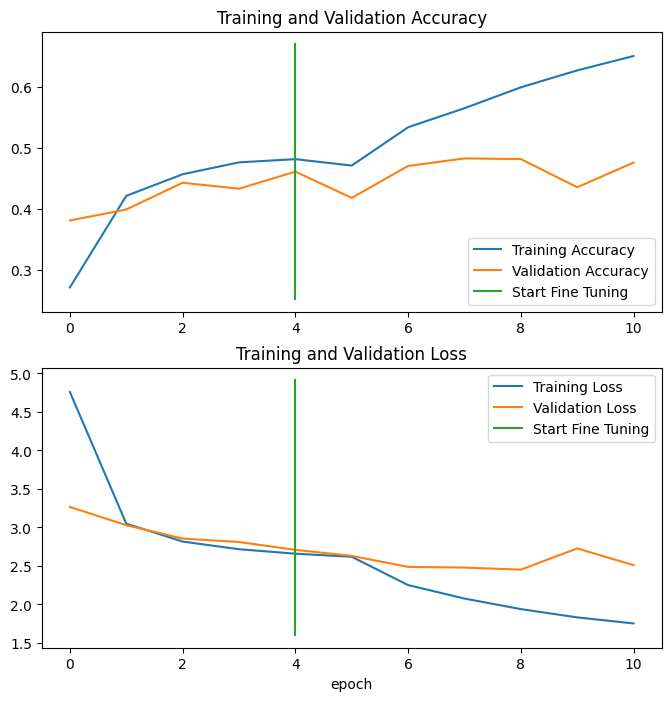

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_mixed_feature_extractor_3,
                 new_history=history_mixed_feature_extractor_fine_tune_3,
                 initial_epochs=5)

### CHECKPOINT: 6. Improve upon model in (5) by finding the ideal learning rate

In [ ]:
# Set global policy to mixed precision
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

class_names = train_data_all_10_percent.class_names

# Setup the base model and freeze its layers (this will extract features)
base_model_6 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_6.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model_6(x, training=False) # put the base model in inference mode so weights which needs to stay frozen, stays frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

x = layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)
mixed_pre_model_4 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile
mixed_pre_model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_mixed_feature_extractor_3 = mixed_pre_model_4.fit(train_data_all_10_percent,
                                            epochs=5,
                                            validation_data=test_data,
                                            validation_steps=int(0.15 * len(test_data)),
                                            )

Epoch 1/5
237/237 [==============================] - 43s 137ms/step - loss: 4.7462 - accuracy: 0.2689 - val_loss: 3.3162 - val_accuracy: 0.3610
Epoch 2/5
237/237 [==============================] - 28s 115ms/step - loss: 3.0382 - accuracy: 0.4271 - val_loss: 2.9160 - val_accuracy: 0.4213
Epoch 3/5
237/237 [==============================] - 30s 125ms/step - loss: 2.8258 - accuracy: 0.4564 - val_loss: 2.8277 - val_accuracy: 0.4346
Epoch 4/5
237/237 [==============================] - 29s 122ms/step - loss: 2.7108 - accuracy: 0.4733 - val_loss: 2.7245 - val_accuracy: 0.4478
Epoch 5/5
237/237 [==============================] - 27s 113ms/step - loss: 2.6587 - accuracy: 0.4865 - val_loss: 2.7019 - val_accuracy: 0.4515


In [ ]:
# Get a summary of model we've created
mixed_pre_model_4.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pool_layer (Glo  (None, 1280)              0         
 balAveragePooling2D)                                            
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                           

In [ ]:
# Unfreeze all of the layers in the base model
base_model_6.trainable = True

# Refreeze every layer except the last 5
for layer in base_model_6.layers[:-5]:
  layer.trainable = False

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))


# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
mixed_pre_model_4.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(), # learning rate lowered by 10x
                        metrics=["accuracy"])

# Fit the model
history_4 = mixed_pre_model_4.fit(train_data_all_10_percent, # this is a combination of labels and sample data
                        epochs=50,
                        steps_per_epoch=len(train_data_all_10_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/50
237/237 [==============================] - 91s 347ms/step - loss: 1.2867 - accuracy: 0.7925 - val_loss: 2.3020 - val_accuracy: 0.5490 - lr: 1.0000e-06
Epoch 2/50
237/237 [==============================] - 103s 433ms/step - loss: 1.2470 - accuracy: 0.8114 - val_loss: 2.2549 - val_accuracy: 0.5570 - lr: 1.1220e-06
Epoch 3/50
237/237 [==============================] - 76s 318ms/step - loss: 1.2119 - accuracy: 0.8190 - val_loss: 2.2167 - val_accuracy: 0.5650 - lr: 1.2589e-06
Epoch 4/50
237/237 [==============================] - ETA: 0s - loss: 1.1822 - accuracy: 0.8297

In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(base_model_6.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_9 False
1 rescaling_16 False
2 normalization_8 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 = 10)

# Fine-tune our model
history_mixed_feature_extractor_fine_tune_4 = mixed_pre_model_4.fit(train_data_all_10_percent,
                                                                epochs=fine_tune_epochs,
                                                                validation_data=test_data,
                                                                validation_steps=int(0.15 * len(test_data)),
                                                                initial_epoch=history_mixed_feature_extractor.epoch[-1])

Epoch 5/10
237/237 [==============================] - 45s 145ms/step - loss: 2.6184 - accuracy: 0.4713 - val_loss: 2.6297 - val_accuracy: 0.4182
Epoch 6/10
237/237 [==============================] - 30s 125ms/step - loss: 2.2510 - accuracy: 0.5343 - val_loss: 2.4874 - val_accuracy: 0.4706
Epoch 7/10
237/237 [==============================] - 28s 117ms/step - loss: 2.0761 - accuracy: 0.5655 - val_loss: 2.4782 - val_accuracy: 0.4831
Epoch 8/10
237/237 [==============================] - 31s 129ms/step - loss: 1.9390 - accuracy: 0.5999 - val_loss: 2.4513 - val_accuracy: 0.4820
Epoch 9/10
237/237 [==============================] - 28s 116ms/step - loss: 1.8314 - accuracy: 0.6277 - val_loss: 2.7273 - val_accuracy: 0.4356
Epoch 10/10
237/237 [==============================] - 29s 123ms/step - loss: 1.7530 - accuracy: 0.6514 - val_loss: 2.5096 - val_accuracy: 0.4762


In [ ]:
# Evaluate on the whole test data
mixed_feature_extractor_fine_tune_results_4 = mixed_pre_model_4.evaluate(test_data)
mixed_feature_extractor_fine_tune_results_4

790/790 [==============================] - 58s 73ms/step - loss: 2.1049 - accuracy: 0.5726


[2.1049070358276367, 0.572633683681488]

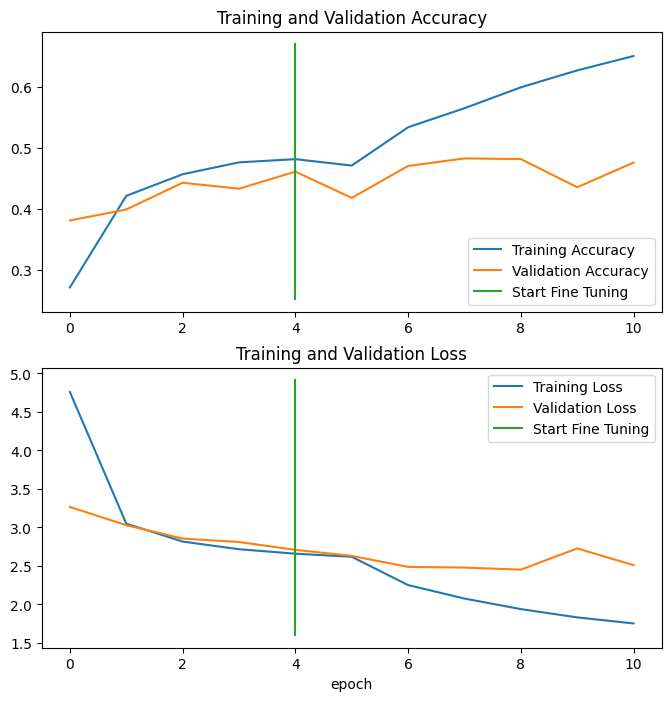

In [ ]:
# Compare the history of feature extraction model with fine-tuning model
compare_historys(original_history=history_mixed_feature_extractor_4,
                 new_history=history_mixed_feature_extractor_fine_tune_4,
                 initial_epochs=5)

## 📖 06. Transfer Learning in TensorFlow Part 3: Scaling-up Extra-curriculum

* Spend 15-minutes reading up on the [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback. What does it do? How could we use it in our model training?
* Spend an hour reading about [Streamlit](https://www.streamlit.io/). What does it do? How might you integrate some of the things we've done in this notebook in a Streamlit app?